In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
values = np.random.randn(100)
values[:10]

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [3]:
dates = pd.date_range(start='2023-01-01',end='2023-04-10',freq='D')
dates[:10]

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(values,index=dates,columns=['value'])
df.head()

,value
2023-01-01,0.496714
2023-01-02,-0.138264
2023-01-03,0.647689
2023-01-04,1.523030
2023-01-05,-0.234153


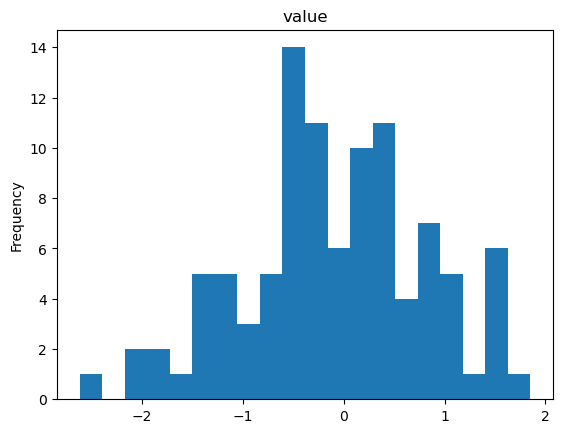

In [5]:
df['value'].plot(kind='hist',bins=20,title='value')
plt.show()

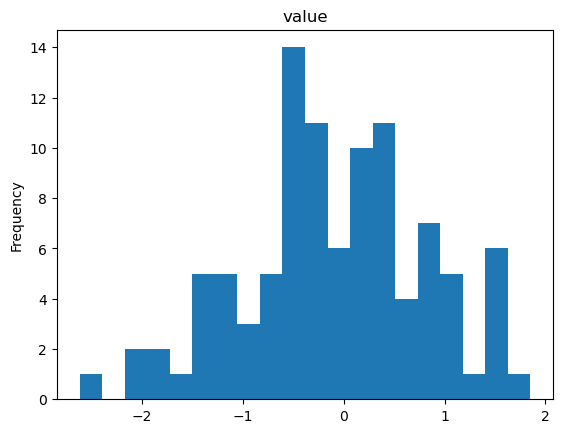

In [6]:
df['value'].plot(kind='hist',bins=20,title='value')
plt.show()

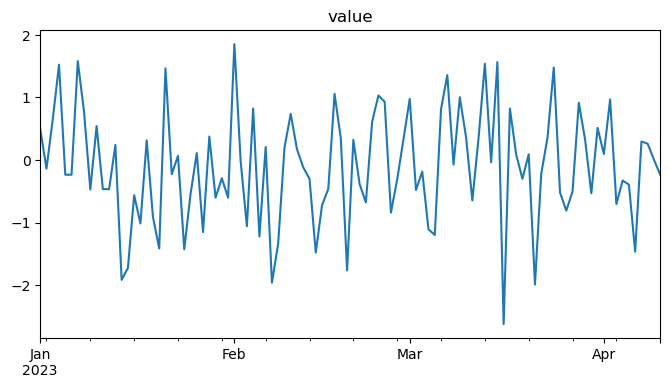

In [7]:
df['value'].plot(kind='line',figsize=(8,4),title='value')
plt.show()

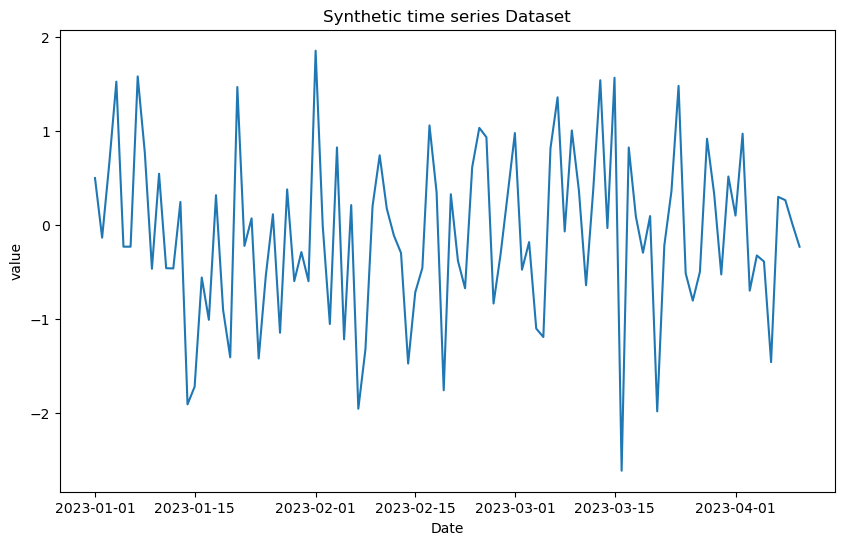

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df['value'])
plt.xlabel('Date')
plt.ylabel('value')
plt.title('Synthetic time series Dataset')
plt.show()

In [9]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df.head()

,value,year,month,day,weekday
2023-01-01,0.496714,2023,1,1,6
2023-01-02,-0.138264,2023,1,2,0
2023-01-03,0.647689,2023,1,3,1
2023-01-04,1.523030,2023,1,4,2
2023-01-05,-0.234153,2023,1,5,3


In [10]:
df['lag_1']=df['value'].shift(1)
df.head()

,value,year,month,day,weekday,lag_1
2023-01-01,0.496714,2023,1,1,6,NaN
2023-01-02,-0.138264,2023,1,2,0,0.496714
2023-01-03,0.647689,2023,1,3,1,-0.138264
2023-01-04,1.523030,2023,1,4,2,0.647689
2023-01-05,-0.234153,2023,1,5,3,1.523030


In [11]:
df['lag_2']=df['value'].shift(2)
df.head()

,value,year,month,day,weekday,lag_1,lag_2
2023-01-01,0.496714,2023,1,1,6,NaN,NaN
2023-01-02,-0.138264,2023,1,2,0,0.496714,NaN
2023-01-03,0.647689,2023,1,3,1,-0.138264,0.496714
2023-01-04,1.523030,2023,1,4,2,0.647689,-0.138264
2023-01-05,-0.234153,2023,1,5,3,1.523030,0.647689


In [12]:
df['rollling_mean_5'] = df['value'].rolling(5).mean()
df['rollling_std_5'] = df['value'].rolling(5).std()
df['rollling_min_5'] = df['value'].rolling(5).min()
df['rollling_max_5'] = df['value'].rolling(5).max()
df.head()

,value,year,month,day,weekday,lag_1,lag_2,rollling_mean_5,rollling_std_5,rollling_min_5,rollling_max_5
2023-01-01,0.496714,2023,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,-0.138264,2023,1,2,0,0.496714,NaN,NaN,NaN,NaN,NaN
2023-01-03,0.647689,2023,1,3,1,-0.138264,0.496714,NaN,NaN,NaN,NaN
2023-01-04,1.523030,2023,1,4,2,0.647689,-0.138264,NaN,NaN,NaN,NaN
2023-01-05,-0.234153,2023,1,5,3,1.523030,0.647689,0.459003,0.708232,-0.234153,1.52303


In [13]:
df['expanding_mean_5'] = df['value'].expanding(5).mean()
df['expanding_std_5'] = df['value'].expanding(5).std()
df['expanding_min_5'] = df['value'].expanding(5).min()
df['expanding_max_5'] = df['value'].expanding(5).max()
df.head()

,value,year,month,day,weekday,lag_1,lag_2,rollling_mean_5,rollling_std_5,rollling_min_5,rollling_max_5,expanding_mean_5,expanding_std_5,expanding_min_5,expanding_max_5
2023-01-01,0.496714,2023,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,-0.138264,2023,1,2,0,0.496714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,0.647689,2023,1,3,1,-0.138264,0.496714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,1.523030,2023,1,4,2,0.647689,-0.138264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,-0.234153,2023,1,5,3,1.523030,0.647689,0.459003,0.708232,-0.234153,1.52303,0.459003,0.708232,-0.234153,1.52303
